In [21]:
import sys
import os
import dlib
import glob
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [10]:
predictor_path = "shape_predictor_68_face_landmarks.dat/data"
# faces_folder_path = "./data/Eye_chimeraToPublish/0"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

In [11]:

win = dlib.image_window()

for f in glob.glob(os.path.join(faces_folder_path, ".jpg")):
    print("Processing file: {}".format(f))
    img = io.imread(f)

    win.clear_overlay()
    win.set_image(img)

    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))
    for k, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        # Get the landmarks/parts for the face in box d.
        shape = predictor(img, d)
        print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
                                                  shape.part(1)))
        # Draw the face landmarks on the screen.
        win.add_overlay(shape)
        print(shape.part(0))
    win.add_overlay(dets)
dlib.hit_enter_to_continue()

In [6]:
shape.part(0)

NameError: name 'shape' is not defined

In [7]:
shape = dlib.face_utils.shape_to_np(shape)

AttributeError: module 'dlib' has no attribute 'face_utils'

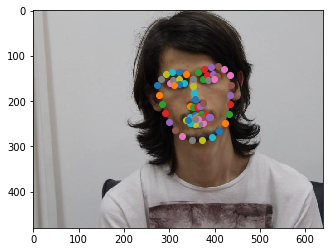

In [12]:
def get_landmarks(im):
    rects = detector(im, 1)
    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

im = io.imread("./data/Eye_chimeraToPublish/0/eyes003019.jpg")
landmarks = get_landmarks(im)
plt.imshow(im)
for point in landmarks:
    plt.plot(point[0,0], point[0,1], "o")
# print(landmarks)

In [17]:
landmarks[0,0]

272

In [25]:
img = io.imread("./data/columbia_gaze_data_set/Columbia Gaze Data Set/0001/0001_2m_0P_0V_0H.jpg")
print(img.shape)
mat = get_landmarks(example_img)

pad_scale=0.4
resize_width=52
resize_height=34

left_left = mat[36,0]
left_right = mat[39,0]
left_top = min(mat[37,1], mat[38,1])
left_bottom = max(mat[40,1], mat[41,1])
right_left = mat[42,0]
right_right = mat[45,0]
right_top = min(mat[43,1], mat[44,1])
right_bottom = max(mat[46,1], mat[47,1])
# left pad
left_pad_width = int((left_right - left_left) * pad_scale)
left_pad_height = int((left_bottom - left_top) * pad_scale)
# right pad
right_pad_width = int((right_right - right_left) * pad_scale)
right_pad_height = int((right_bottom - right_top) * pad_scale)
# left and right eye plus pads
left_eye = img[left_top-left_pad_height : left_bottom+left_pad_height, left_left-left_pad_width : left_right+left_pad_width, :]
right_eye = img[right_top-right_pad_height : right_bottom+right_pad_height, right_left-right_pad_width : right_right+right_pad_width, :]
# resize
left_eye = cv2.resize(left_eye,(resize_width, resize_height),interpolation=cv2.INTER_CUBIC)
right_eye = cv2.resize(right_eye,(resize_width, resize_height),interpolation=cv2.INTER_CUBIC)

(3456, 5184, 3)


(34, 52, 3)


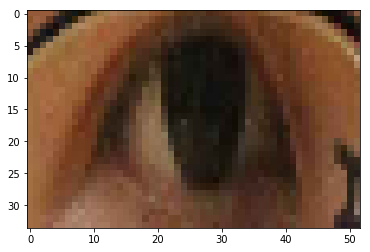

In [27]:
plt.imshow(left_eye)
print(left_eye.shape)